In [109]:
import pandas as pd
import numpy as np
import os

In [2]:
experience_version_report = 2

In [3]:
# 0.634 --> Experience 1
# 0.777 --> Experience 2
# 0.592 --> Experience 3
# Como ler a sheet do excel
df = None
dummy_score = 0
if experience_version_report == 1:
    df = pd.read_excel('./Output/Results_ML_OFICIAL2.xlsx', sheet_name="Original")
    dummy_score = 0.634
elif experience_version_report == 2:
    df = pd.read_excel('./Output/Results_ML_OFICIAL2.xlsx', sheet_name="ProjetosAnulados_Filtrados")
    dummy_score = 0.777
else:
    df = pd.read_excel('./Output/Results_ML_OFICIAL2.xlsx', sheet_name="NewDataset")
    dummy_score = 0.592


In [4]:
df

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Train,F1_Train,Precision_Train,Recall_Train,...,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Treino),#AnuladosPosContrato(Treino),#Terminados(Teste),#AnuladosPosContrato(Teste)
0,DecisionTree,Baseline no pre-processing (with projects filt...,1,2,allFeat,267,1.000000,1.000000,1.000000,1.000000,...,0.385714,0.590179,27,178,46,43,536,147,224,70
1,GaussianNaiveBayes,Baseline no pre-processing (with projects filt...,1,2,allFeat,267,0.803807,0.367925,0.600000,0.265306,...,0.214286,0.569196,15,207,17,55,536,147,224,70
2,K-NearestNeighbors,Baseline no pre-processing (with projects filt...,1,2,allFeat,267,0.808199,0.367150,0.633333,0.258503,...,0.128571,0.526339,9,207,17,61,536,147,224,70
3,LinearSupportVectorClassification,Baseline no pre-processing (with projects filt...,1,2,allFeat,267,0.724744,0.235772,0.292929,0.197279,...,0.114286,0.492411,8,195,29,62,536,147,224,70
4,LogisticRegression,Baseline no pre-processing (with projects filt...,1,2,allFeat,267,0.800878,0.209302,0.720000,0.122449,...,0.071429,0.526786,5,220,4,65,536,147,224,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,LogisticRegression,StandardScaler + SMOTE + UnderSampling (with p...,5,2,manualFeat,22,0.652985,0.629482,0.675214,0.589552,...,0.485714,0.600000,34,160,64,36,536,536,224,70
401,MLPClassifier,StandardScaler + SMOTE + UnderSampling (with p...,5,2,manualFeat,22,0.840485,0.840634,0.839851,0.841418,...,0.357143,0.560268,25,171,53,45,536,536,224,70
402,Perceptron,StandardScaler + SMOTE + UnderSampling (with p...,5,2,manualFeat,22,0.560634,0.514933,0.574713,0.466418,...,0.500000,0.564732,35,141,83,35,536,536,224,70
403,RandomForest,StandardScaler + SMOTE + UnderSampling (with p...,5,2,manualFeat,22,1.000000,1.000000,1.000000,1.000000,...,0.342857,0.600000,24,192,32,46,536,536,224,70


In [3]:
# df_original = pd.read_csv('./Output/results_original_data.csv')
# df_filtered = pd.read_csv('./Output/results_filtered_data.csv')

In [14]:
display(df_clean.loc[:, ['Model', 'Experience', 'Features_List', 'Accuracy_Test']].sort_values(by=['Accuracy_Test'], ascending=False))

,Model,Experience,Features_List,Accuracy_Test
211,LogisticRegression,StandardScaler + PCA (with projects filtering),feat5,0.816327
130,LogisticRegression,StandardScaler (with projects filtering),feat5,0.816327
129,LinearSupportVectorClassification,StandardScaler (with projects filtering),feat5,0.812925
210,LinearSupportVectorClassification,StandardScaler + PCA (with projects filtering),feat5,0.812925
107,SupportVectorClassification,StandardScaler (with projects filtering),feat2,0.806122
...,...,...,...,...
30,LinearSupportVectorClassification,Baseline no pre-processing (with projects filt...,feat3,0.394558
154,GaussianNaiveBayes,StandardScaler (with projects filtering),manualFeat,0.363946
73,GaussianNaiveBayes,Baseline no pre-processing (with projects filt...,manualFeat,0.309524
316,GaussianNaiveBayes,StandardScaler + SMOTE (with projects filtering),manualFeat,0.306122


### Filtrar experiência com resultados inferiores ou iguais ao Dummy + Modelos overfit

In [5]:
# Excluir experiencias com precisão de teste inferior ao dummy + experiências em que a precisão nos datasets de treino sejam = 1
df_clean = df.loc[(df['Accuracy_Test'] >= dummy_score) | (df['Accuracy_Train'] != 1)]

In [6]:
df.shape

(405, 24)

In [7]:
df_clean.shape

(345, 24)

In [8]:
print("Filtraram-se %i registos" % (df.shape[0] - df_clean.shape[0]))

Filtraram-se 60 registos


# Análise de resultados

Foram realizadas 3 tipos de experiências para 3 datasets diferentes:

    1. Com os dados originais em que foram filtrados projetos em que não conseguíamos obter informação antes do ano de candidatura

    2. Aplicação de mais um filtro de projetos para a classe dos projetos anulados. Dentro dos projetos anulados foram apenas escolhidos os projetos em que o motivo de anulação foi devido à "Desistência do promotor".
    
    3. Inclusão dos projetos filtrados inicialmente no ponto 1, são incluído no dataset no entanto todas as features relacionadas com os rácios de performance em relação ao projeto são substituídos pelo valor 0. Aumentando o conjunto de dados. 

### Retirar os melhores resultados para cada modelo

In [16]:
# Pode haver vários modelos com scores as melhores score
best_models = df_clean.groupby('Model')['Accuracy_Test'].max().to_frame(name = 'max').reset_index()
display(best_models)

,Model,max
0,GaussianNaiveBayes,0.806122
1,K-NearestNeighbors,0.806122
2,LinearSupportVectorClassification,0.812925
3,LogisticRegression,0.816327
4,MLPClassifier,0.806122
5,Perceptron,0.802721
6,RandomForest,0.806122
7,SupportVectorClassification,0.806122


In [19]:
select_columns = [
    'Model',
    'Experience',
    'ExperienceNumber',
    'ExperienceVersion',
    'Features_List',
    'Nr_Features',
    'Accuracy_Test',
    'F1_Test',
    'Precision_Test',
    'Recall_Test',
    'ROC_AUC_Test',
    'TP',
    'TN',
    'FP',
    'FN',
    '#Terminados(Teste)',
    '#AnuladosPosContrato(Teste)'
]

#### O que se observar
1. Observar A experiencia que se repete mais
2. O tipo de features mais utilizadas
3. Observação da evolução das métricas ao longo das experiências

In [20]:
final_best_models = df_clean.merge(best_models, how="inner", left_on=["Model", "Accuracy_Test"], right_on=["Model", "max"])

display(final_best_models[select_columns])

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Teste),#AnuladosPosContrato(Teste)
0,RandomForest,Baseline no pre-processing (with projects filt...,1,2,allFeat,267,0.806122,0.344828,0.882353,0.214286,0.602679,15,222,2,55,224,70
1,RandomForest,Baseline no pre-processing (with projects filt...,1,2,feat1,30,0.806122,0.400000,0.760000,0.271429,0.622321,19,218,6,51,224,70
2,RandomForest,Baseline no pre-processing (with projects filt...,1,2,feat5,50,0.806122,0.359551,0.842105,0.228571,0.607589,16,221,3,54,224,70
3,RandomForest,StandardScaler (with projects filtering),2,2,allFeat,267,0.806122,0.344828,0.882353,0.214286,0.602679,15,222,2,55,224,70
4,RandomForest,StandardScaler (with projects filtering),2,2,feat1,30,0.806122,0.400000,0.760000,0.271429,0.622321,19,218,6,51,224,70
5,RandomForest,StandardScaler (with projects filtering),2,2,feat5,50,0.806122,0.359551,0.842105,0.228571,0.607589,16,221,3,54,224,70
6,RandomForest,StandardScaler + PCA (with projects filtering),3,2,feat5,50,0.806122,0.329412,0.933333,0.200000,0.597768,14,223,1,56,224,70
7,RandomForest,StandardScaler + SMOTE + UnderSampling (with p...,5,2,allFeat,267,0.806122,0.435644,0.709677,0.314286,0.637054,22,215,9,48,224,70
8,GaussianNaiveBayes,Baseline no pre-processing (with projects filt...,1,2,feat1,30,0.806122,0.313253,1.000000,0.185714,0.592857,13,224,0,57,224,70
9,GaussianNaiveBayes,Baseline no pre-processing (with projects filt...,1,2,feat3,50,0.806122,0.313253,1.000000,0.185714,0.592857,13,224,0,57,224,70


In [ ]:
# Fará sentido ir buscar somente a melhor score da combinação modelo_feature para se analisar a evolução das experiências ao longo do tempo?

#### Comparar os resultados com as várias experiências realizadas

In [24]:
# Obter os melhores resultados para cada feature + modelo 
best_models_feature = df_clean.groupby(['Model', 'Experience'])['Accuracy_Test'].max().to_frame(name = 'max').reset_index()
display(best_models_feature)

,Model,Experience,max
0,GaussianNaiveBayes,Baseline no pre-processing (with projects filt...,0.806122
1,GaussianNaiveBayes,StandardScaler (with projects filtering),0.806122
2,GaussianNaiveBayes,StandardScaler + PCA (with projects filtering),0.785714
3,GaussianNaiveBayes,StandardScaler + SMOTE (with projects filtering),0.806122
4,GaussianNaiveBayes,StandardScaler + SMOTE + UnderSampling (with p...,0.806122
5,K-NearestNeighbors,Baseline no pre-processing (with projects filt...,0.772109
6,K-NearestNeighbors,StandardScaler (with projects filtering),0.806122
7,K-NearestNeighbors,StandardScaler + PCA (with projects filtering),0.806122
8,K-NearestNeighbors,StandardScaler + SMOTE (with projects filtering),0.693878
9,K-NearestNeighbors,StandardScaler + SMOTE + UnderSampling (with p...,0.693878


### Mediana dos scores das features e comparar

In [30]:
# Obter a mediana dos scores de cada feature_experience e perceber quais são as features que obtiveram a melhor performance
feature_median = df_clean.groupby(['Features_List']).agg({
    'Accuracy_Test': 'median',
    'F1_Test': 'median',
    'Precision_Test': 'median',
    'Recall_Test': 'median',
    'ROC_AUC_Test': 'median'
})
display(feature_median)

,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test
Features_List,,,,,
allFeat,0.751701,0.388249,0.451042,0.342857,0.595982
feat1,0.782313,0.361255,0.573214,0.271429,0.598437
feat2,0.778912,0.351648,0.652174,0.242857,0.593304
feat3,0.761905,0.361702,0.500000,0.242857,0.592857
feat4,0.772109,0.364865,0.538462,0.300000,0.602232
feat5,0.770408,0.396560,0.529070,0.300000,0.607589
feat6,0.761905,0.385321,0.483871,0.271429,0.609821
feat7,0.756803,0.313982,0.456597,0.235714,0.575000
manualFeat,0.727891,0.309859,0.320513,0.342857,0.545982


### Mediana dos scores dos modelos e comparar

In [32]:
# Obter a mediana dos scores de cada modelo e perceber quais são as features que obtiveram a melhor performance
model_median = df_clean.groupby(['Model']).agg({
    'Accuracy_Test': 'median',
    'F1_Test': 'median',
    'Precision_Test': 'median',
    'Recall_Test': 'median',
    'ROC_AUC_Test': 'median'
})
display(model_median)

,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test
Model,,,,,
GaussianNaiveBayes,0.789116,0.313253,0.700000,0.185714,0.589286
K-NearestNeighbors,0.734694,0.379888,0.391304,0.271429,0.581250
LinearSupportVectorClassification,0.734694,0.385965,0.401961,0.371429,0.596875
LogisticRegression,0.765306,0.351648,0.555556,0.242857,0.596875
MLPClassifier,0.744898,0.386939,0.448322,0.350000,0.602679
Perceptron,0.721088,0.385321,0.358333,0.414286,0.594643
RandomForest,0.792517,0.382979,0.708333,0.257143,0.613393
SupportVectorClassification,0.761905,0.309524,0.416667,0.185714,0.590625


### Obter gráfico evolução das métricas

In [3]:
# Para cada modelo_feature com melhor score --> obter gráfico para as várias métricas utilizadas (f1,accuracy,precision,recall,auroc) e perceber se existe uma evolução para:
# Baseline
# Pre-Processamneto
# PCA
# SMOTE
# SMOTE + UNDERSAMPLING

# Gráfico terá que ser gerado via excel

In [59]:
# Selecionar as melhores scores para cada modelo_feature em cada experiência
df_best_models_feature = df_clean.merge(best_models_feature, left_on=["Model", "Experience", "Accuracy_Test"], right_on=["Model", "Experience", "max"], how="inner")
display(df_best_models_feature[select_columns])

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Teste),#AnuladosPosContrato(Teste)
0,RandomForest,Baseline no pre-processing (with projects filt...,1,2,allFeat,267,0.806122,0.344828,0.882353,0.214286,0.602679,15,222,2,55,224,70
1,RandomForest,Baseline no pre-processing (with projects filt...,1,2,feat1,30,0.806122,0.400000,0.760000,0.271429,0.622321,19,218,6,51,224,70
2,RandomForest,Baseline no pre-processing (with projects filt...,1,2,feat5,50,0.806122,0.359551,0.842105,0.228571,0.607589,16,221,3,54,224,70
3,SupportVectorClassification,Baseline no pre-processing (with projects filt...,1,2,allFeat,267,0.761905,0.000000,0.000000,0.000000,0.500000,0,224,0,70,224,70
4,SupportVectorClassification,Baseline no pre-processing (with projects filt...,1,2,feat1,30,0.761905,0.000000,0.000000,0.000000,0.500000,0,224,0,70,224,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Perceptron,StandardScaler + SMOTE + UnderSampling (with p...,5,2,feat1,30,0.693878,0.347826,0.352941,0.342857,0.573214,24,180,44,46,224,70
67,LinearSupportVectorClassification,StandardScaler + SMOTE + UnderSampling (with p...,5,2,feat2,30,0.744898,0.369748,0.448980,0.314286,0.596875,22,197,27,48,224,70
68,LogisticRegression,StandardScaler + SMOTE + UnderSampling (with p...,5,2,feat2,30,0.744898,0.369748,0.448980,0.314286,0.596875,22,197,27,48,224,70
69,K-NearestNeighbors,StandardScaler + SMOTE + UnderSampling (with p...,5,2,feat3,50,0.693878,0.444444,0.391304,0.514286,0.632143,36,168,56,34,224,70


In [ ]:
"""
F1_Test	Precision_Test	Recall_Test	ROC_AUC_Test
"""

In [ ]:
# Sort the DataFrame based on 'value' and 'timestamp' within each group
df = df.sort_values(['group', 'value', 'timestamp'])

# Create the 'row_number' column by counting occurrences within each group
df['row_number'] = df.groupby('group').cumcount() + 1

print(df)

In [62]:
# Sort the DataFrame based on 'column1', 'column2', and 'column3'
df_best_models_feature = df_best_models_feature.sort_values(['F1_Test', 'ROC_AUC_Test', 'Precision_Test', 'Recall_Test'])#.sort_values(by=['Model_Feature', 'F1_Test', 'ROC_AUC_Test', 'Precision_Test', 'Recall_Test'], ascending=[True, False, False, False, False])

display(df_best_models_feature)

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Train,F1_Train,Precision_Train,Recall_Train,...,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Treino),#AnuladosPosContrato(Treino),#Terminados(Teste),#AnuladosPosContrato(Teste),max
3,SupportVectorClassification,Baseline no pre-processing (with projects filt...,1,2,allFeat,267,0.784773,0.000000,0.000000,0.000000,...,0.500000,0,224,0,70,536,147,224,70,0.761905
4,SupportVectorClassification,Baseline no pre-processing (with projects filt...,1,2,feat1,30,0.789165,0.040000,1.000000,0.020408,...,0.500000,0,224,0,70,536,147,224,70,0.761905
5,SupportVectorClassification,Baseline no pre-processing (with projects filt...,1,2,feat2,30,0.789165,0.040000,1.000000,0.020408,...,0.500000,0,224,0,70,536,147,224,70,0.761905
6,SupportVectorClassification,Baseline no pre-processing (with projects filt...,1,2,feat3,50,0.787701,0.026846,1.000000,0.013605,...,0.500000,0,224,0,70,536,147,224,70,0.761905
7,SupportVectorClassification,Baseline no pre-processing (with projects filt...,1,2,feat4,50,0.792094,0.065789,1.000000,0.034014,...,0.500000,0,224,0,70,536,147,224,70,0.761905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,MLPClassifier,StandardScaler + SMOTE (with projects filtering),4,2,feat5,50,0.987873,0.987907,0.985158,0.990672,...,0.636607,31,186,38,39,536,536,224,70,0.738095
48,RandomForest,StandardScaler + SMOTE (with projects filtering),4,2,feat7,50,1.000000,1.000000,1.000000,1.000000,...,0.640625,25,207,17,45,536,536,224,70,0.789116
49,SupportVectorClassification,StandardScaler + SMOTE (with projects filtering),4,2,allFeat,267,0.878731,0.874759,0.904382,0.847015,...,0.643304,31,189,35,39,536,536,224,70,0.748299
61,SupportVectorClassification,StandardScaler + SMOTE + UnderSampling (with p...,5,2,allFeat,267,0.878731,0.874759,0.904382,0.847015,...,0.643304,31,189,35,39,536,536,224,70,0.748299


In [64]:
# Create the 'row_number' column by counting occurrences within each group
df_best_models_feature['row_number'] = df_best_models_feature.groupby(["Model", "Experience"]).cumcount() + 1

In [68]:
select_columns

['Model',
 'Experience',
 'ExperienceNumber',
 'ExperienceVersion',
 'Features_List',
 'Nr_Features',
 'Accuracy_Test',
 'F1_Test',
 'Precision_Test',
 'Recall_Test',
 'ROC_AUC_Test',
 'TP',
 'TN',
 'FP',
 'FN',
 '#Terminados(Teste)',
 '#AnuladosPosContrato(Teste)']

In [69]:
display(df_best_models_feature[['Model',
 'Experience',
 'ExperienceNumber',
 'ExperienceVersion',
 'Features_List',
 'Nr_Features',
 'Accuracy_Test',
 'F1_Test',
 'Precision_Test',
 'Recall_Test',
 'ROC_AUC_Test',
 'TP',
 'TN',
 'FP',
 'FN',
 '#Terminados(Teste)',
 '#AnuladosPosContrato(Teste)',
 "row_number"
 ]])

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Teste),#AnuladosPosContrato(Teste),row_number
3,SupportVectorClassification,Baseline no pre-processing (with projects filt...,1,2,allFeat,267,0.761905,0.000000,0.000000,0.000000,0.500000,0,224,0,70,224,70,1
4,SupportVectorClassification,Baseline no pre-processing (with projects filt...,1,2,feat1,30,0.761905,0.000000,0.000000,0.000000,0.500000,0,224,0,70,224,70,2
5,SupportVectorClassification,Baseline no pre-processing (with projects filt...,1,2,feat2,30,0.761905,0.000000,0.000000,0.000000,0.500000,0,224,0,70,224,70,3
6,SupportVectorClassification,Baseline no pre-processing (with projects filt...,1,2,feat3,50,0.761905,0.000000,0.000000,0.000000,0.500000,0,224,0,70,224,70,4
7,SupportVectorClassification,Baseline no pre-processing (with projects filt...,1,2,feat4,50,0.761905,0.000000,0.000000,0.000000,0.500000,0,224,0,70,224,70,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,MLPClassifier,StandardScaler + SMOTE (with projects filtering),4,2,feat5,50,0.738095,0.446043,0.449275,0.442857,0.636607,31,186,38,39,224,70,2
48,RandomForest,StandardScaler + SMOTE (with projects filtering),4,2,feat7,50,0.789116,0.446429,0.595238,0.357143,0.640625,25,207,17,45,224,70,3
49,SupportVectorClassification,StandardScaler + SMOTE (with projects filtering),4,2,allFeat,267,0.748299,0.455882,0.469697,0.442857,0.643304,31,189,35,39,224,70,1
61,SupportVectorClassification,StandardScaler + SMOTE + UnderSampling (with p...,5,2,allFeat,267,0.748299,0.455882,0.469697,0.442857,0.643304,31,189,35,39,224,70,1


In [74]:
clean_df_best_models_feature = df_best_models_feature.loc[df_best_models_feature['row_number'] == 1].sort_values(by=["Model", "ExperienceNumber"])

In [78]:
graph_df = clean_df_best_models_feature[select_columns].copy().reset_index()

In [79]:
display(graph_df)

,index,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Teste),#AnuladosPosContrato(Teste)
0,12,GaussianNaiveBayes,Baseline no pre-processing (with projects filt...,1,2,feat1,30,0.806122,0.313253,1.000000,0.185714,0.592857,13,224,0,57,224,70
1,22,GaussianNaiveBayes,StandardScaler (with projects filtering),2,2,feat1,30,0.806122,0.313253,1.000000,0.185714,0.592857,13,224,0,57,224,70
2,36,GaussianNaiveBayes,StandardScaler + PCA (with projects filtering),3,2,feat1,30,0.785714,0.322581,0.652174,0.214286,0.589286,15,216,8,55,224,70
3,50,GaussianNaiveBayes,StandardScaler + SMOTE (with projects filtering),4,2,feat1,30,0.806122,0.313253,1.000000,0.185714,0.592857,13,224,0,57,224,70
4,62,GaussianNaiveBayes,StandardScaler + SMOTE + UnderSampling (with p...,5,2,feat1,30,0.806122,0.313253,1.000000,0.185714,0.592857,13,224,0,57,224,70
5,14,K-NearestNeighbors,Baseline no pre-processing (with projects filt...,1,2,feat1,30,0.772109,0.294737,0.560000,0.200000,0.575446,14,213,11,56,224,70
6,29,K-NearestNeighbors,StandardScaler (with projects filtering),2,2,feat2,30,0.806122,0.400000,0.760000,0.271429,0.622321,19,218,6,51,224,70
7,38,K-NearestNeighbors,StandardScaler + PCA (with projects filtering),3,2,feat2,30,0.806122,0.400000,0.760000,0.271429,0.622321,19,218,6,51,224,70
8,56,K-NearestNeighbors,StandardScaler + SMOTE (with projects filtering),4,2,feat3,50,0.693878,0.444444,0.391304,0.514286,0.632143,36,168,56,34,224,70
9,69,K-NearestNeighbors,StandardScaler + SMOTE + UnderSampling (with p...,5,2,feat3,50,0.693878,0.444444,0.391304,0.514286,0.632143,36,168,56,34,224,70


In [81]:
gnb_data

,Accuracy_Test
0,0.806122
1,0.806122
2,0.785714
3,0.806122
4,0.806122


In [91]:
def get_model_metric(df, model_name, metric):
    return df.loc[df['Model'] == model_name, [metric]]

In [117]:
def show_report(df, model_name, metric):
    # Plot the data using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot([1,2,3,4,5], df, marker='o')

    # Add labels, title, and legend
    plt.xlabel('Experience')
    plt.ylabel(metric)
    plt.title('Evolution of %s %s across Experiences' % (model_name, metric))
    plt.legend()

    # Show the plot
    plt.xticks(np.arange(0, 6, 1))
    plt.savefig("./Analysis_Results/" + model_name + "/" + metric)
    plt.grid(True)
    plt.show()

In [111]:
"Analysis_Results/" + "GaussianNaiveBayes"

'Analysis_ResultsGaussianNaiveBayes'

In [113]:
os.path.join("Analysis_Results\\" + "GaussianNaiveBayes", "teste1")

'Analysis_Results\\GaussianNaiveBayes\\teste1'

In [102]:
models_list = [
"GaussianNaiveBayes",
"K-NearestNeighbors",
"LinearSupportVectorClassification",
"LogisticRegression",
"MLPClassifier",
"Perceptron",
"RandomForest",
"SupportVectorClassification",
]
"""F1_Test	Precision_Test	Recall_Test	ROC_AUC_Test"""
metrics_list = [
    ('Accuracy_Test', 'Accuracy'),
    ('F1_Test', ' Precision'),
    ('Recall_Test', ' Recall'),
    ('ROC_AUC_Test', 'ROC_AUC')
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


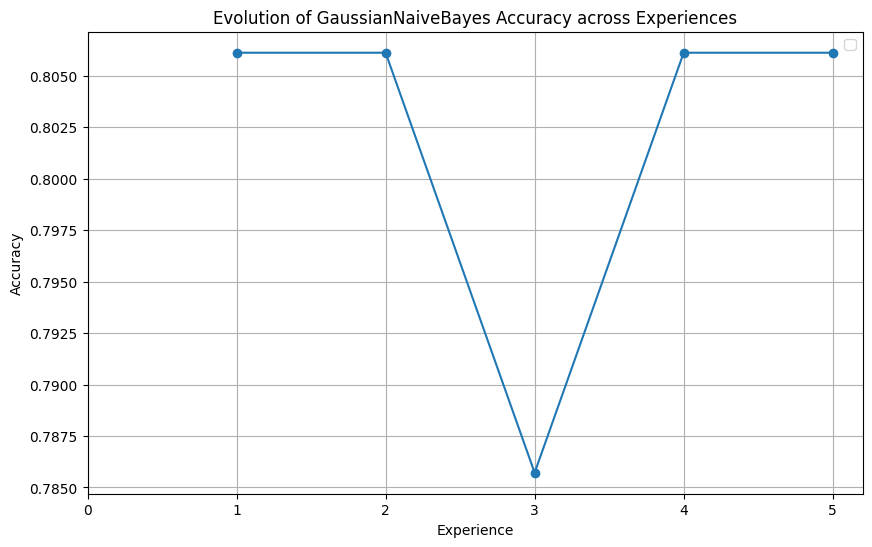

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


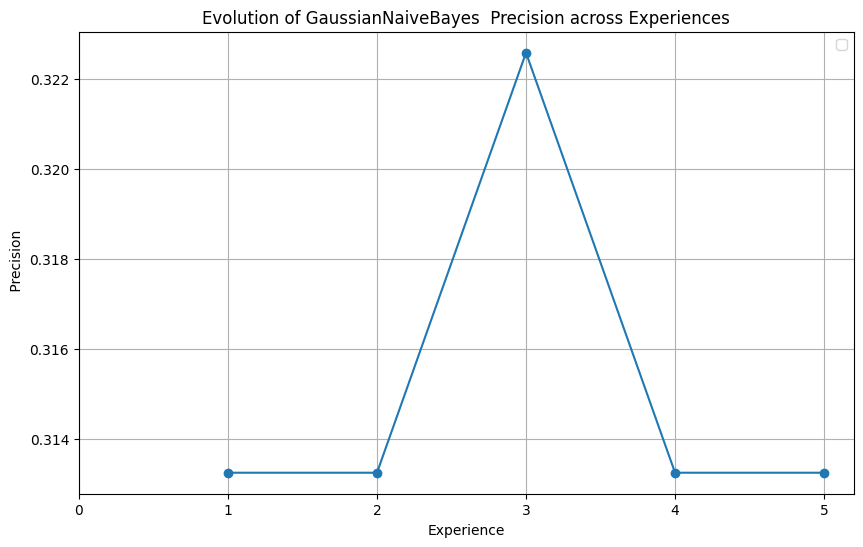

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


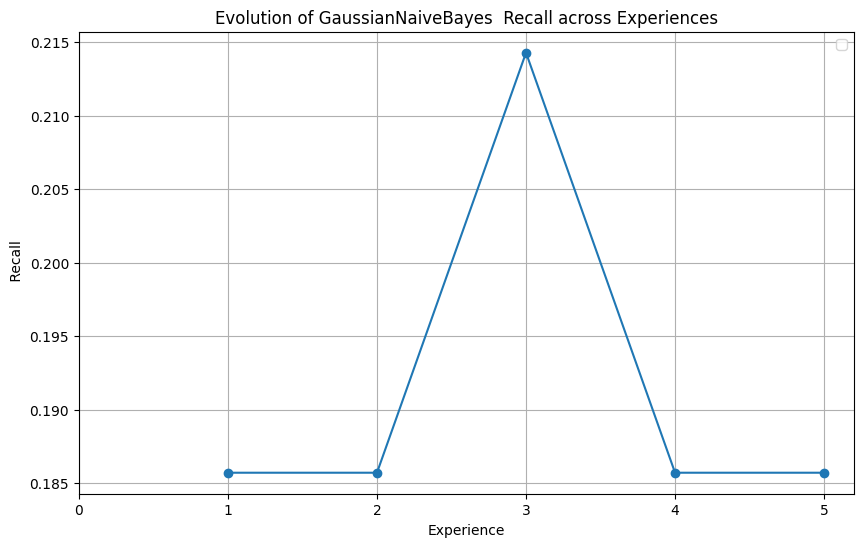

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


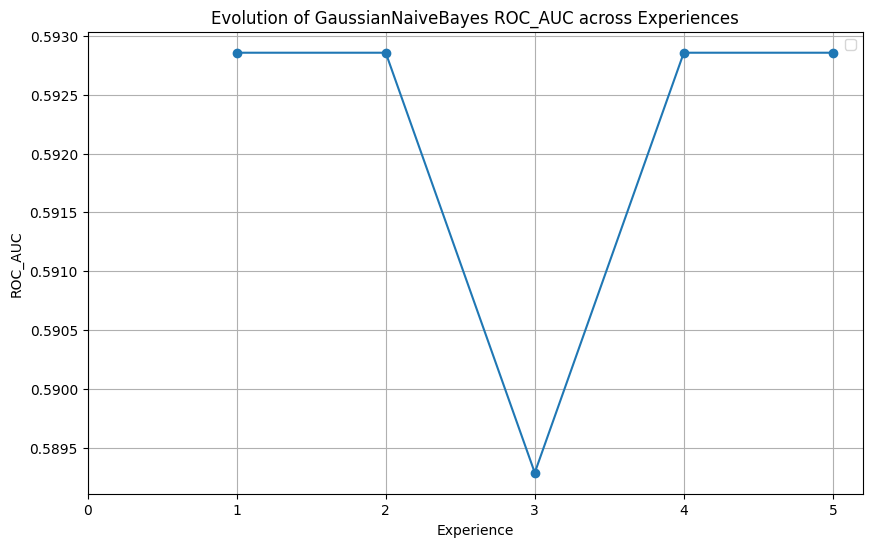

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


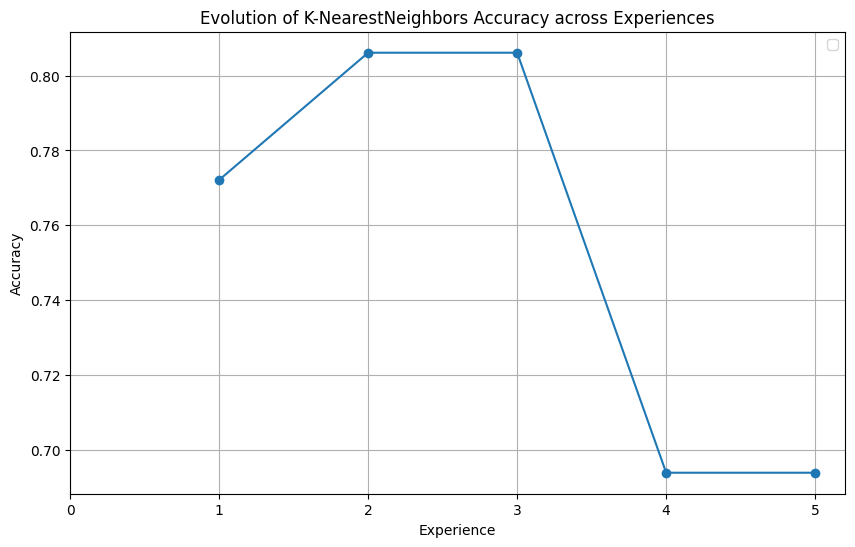

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


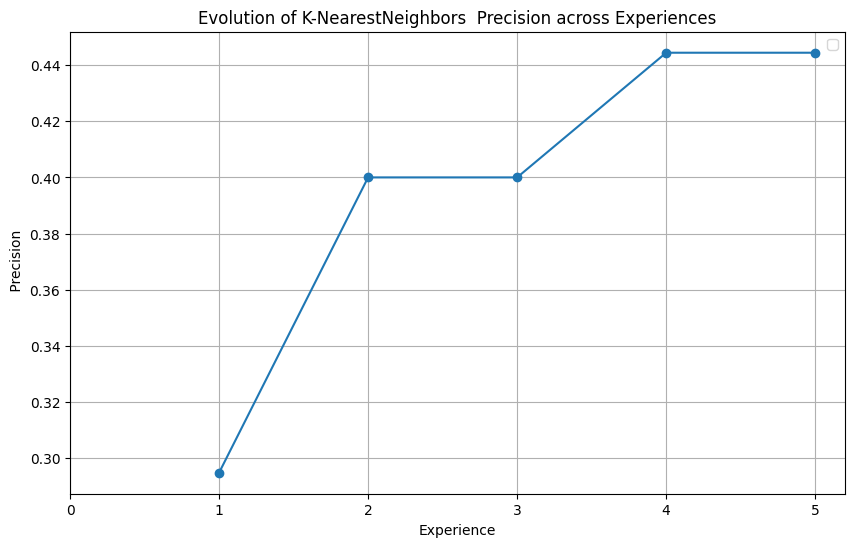

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


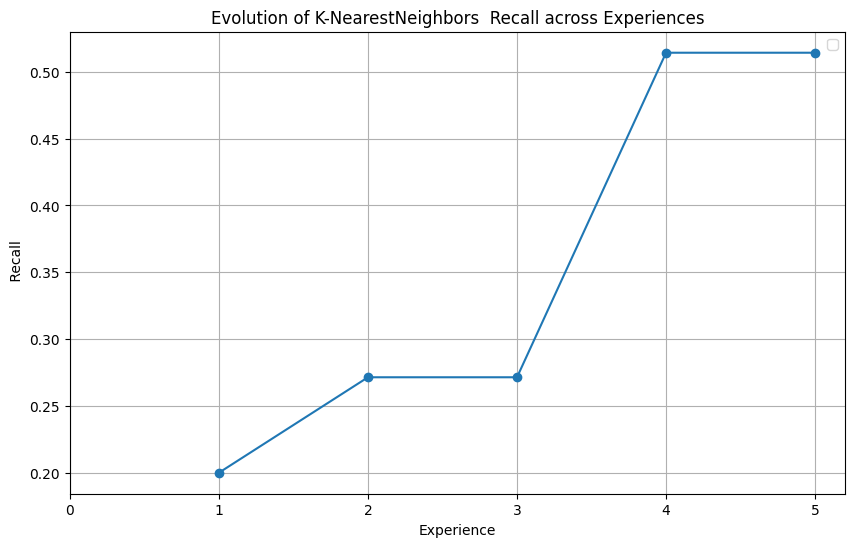

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


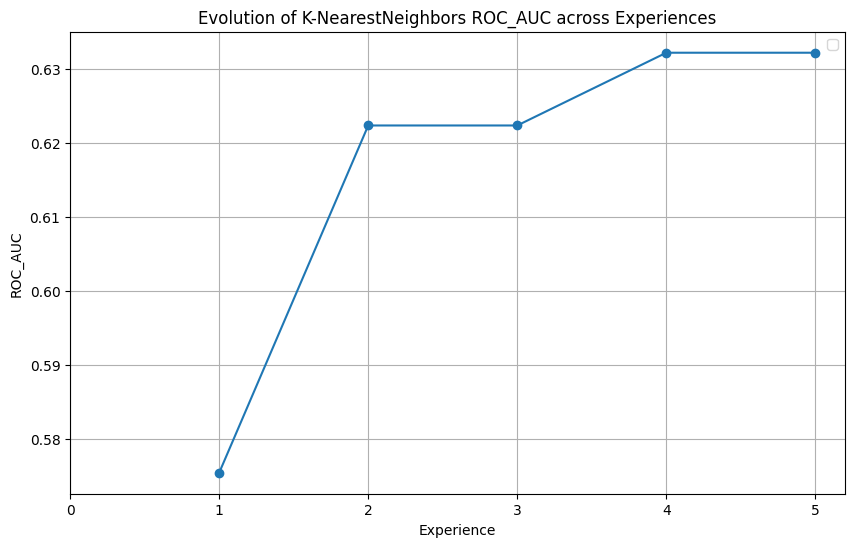

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


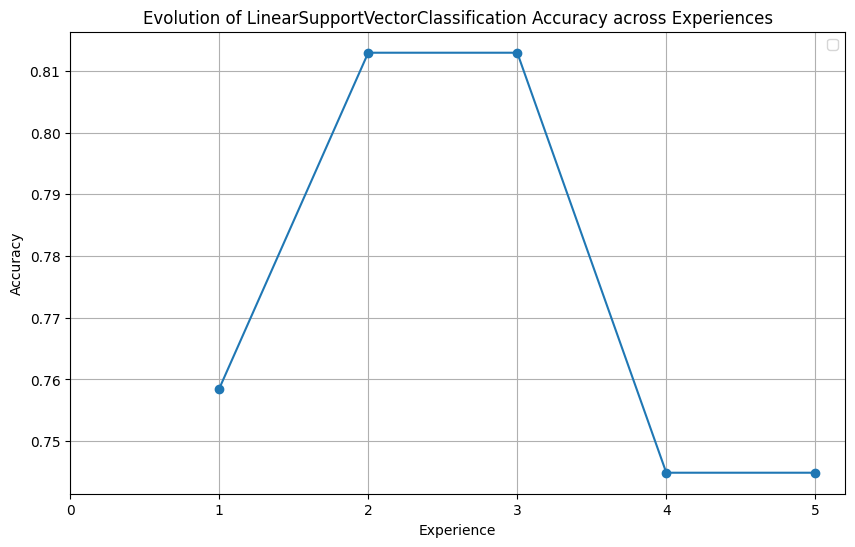

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


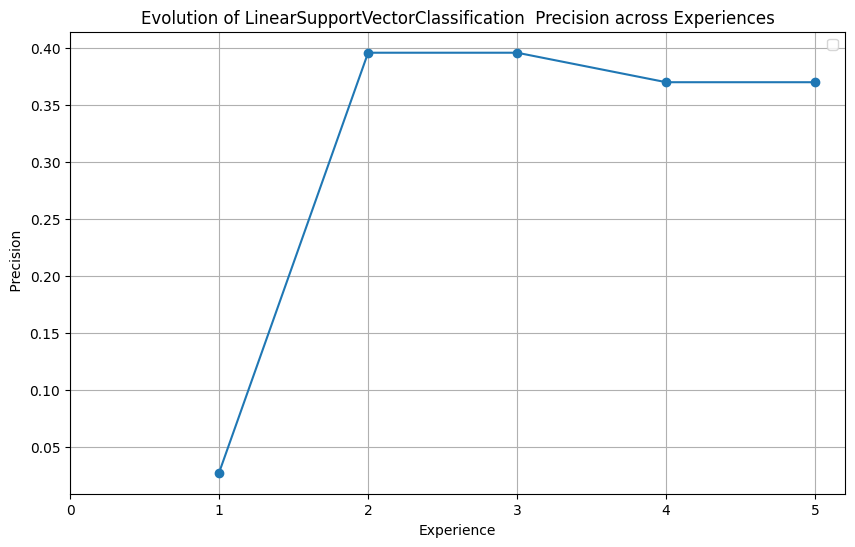

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


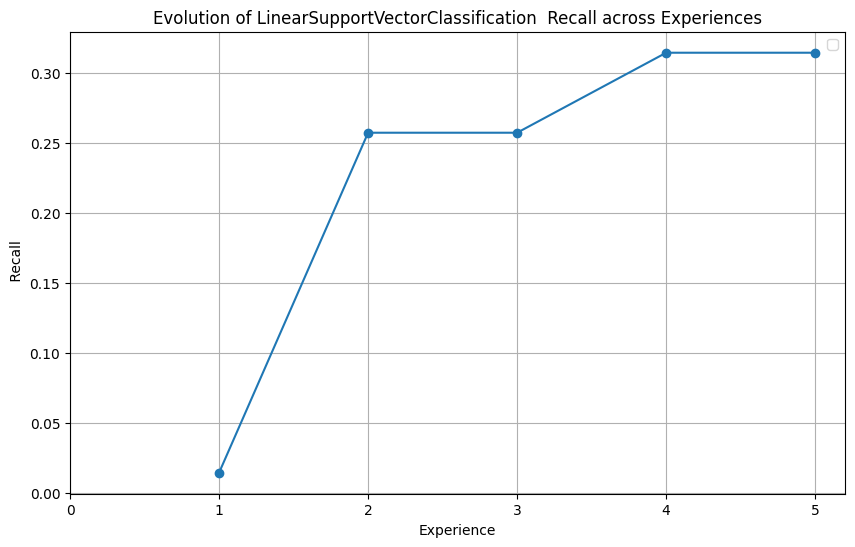

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


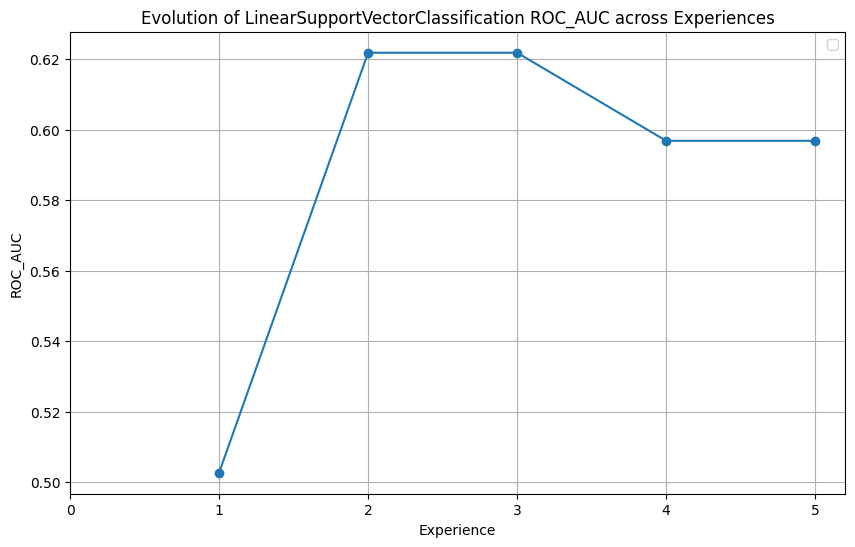

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


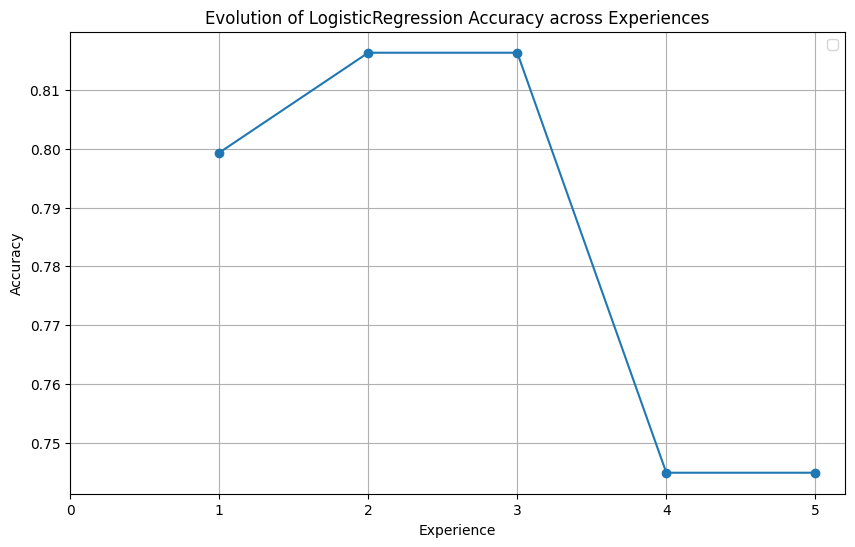

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


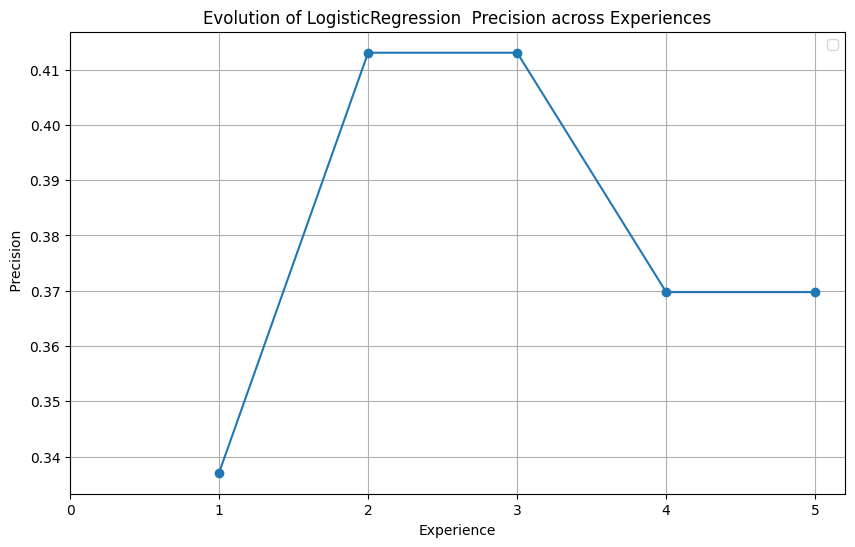

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


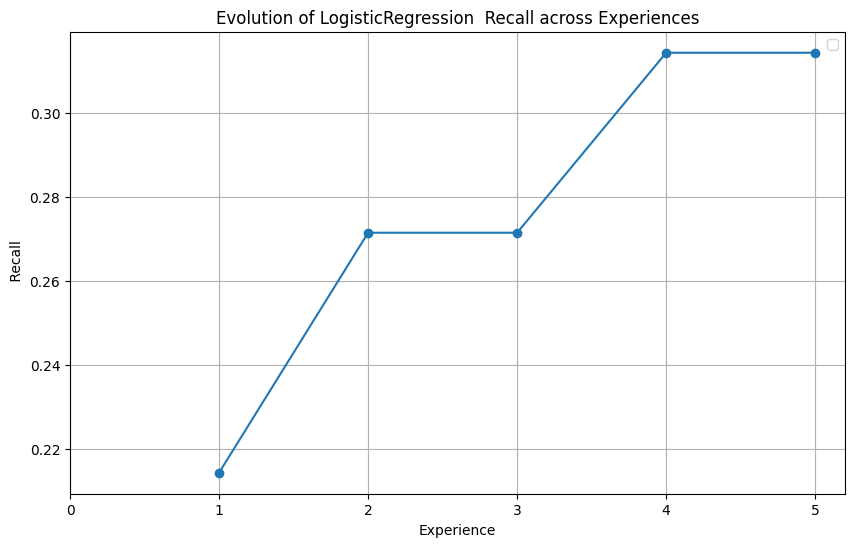

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


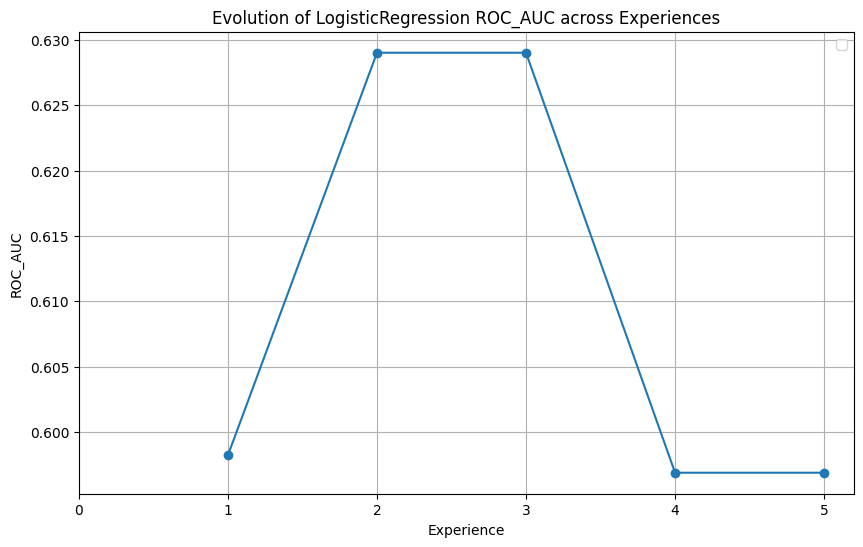

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


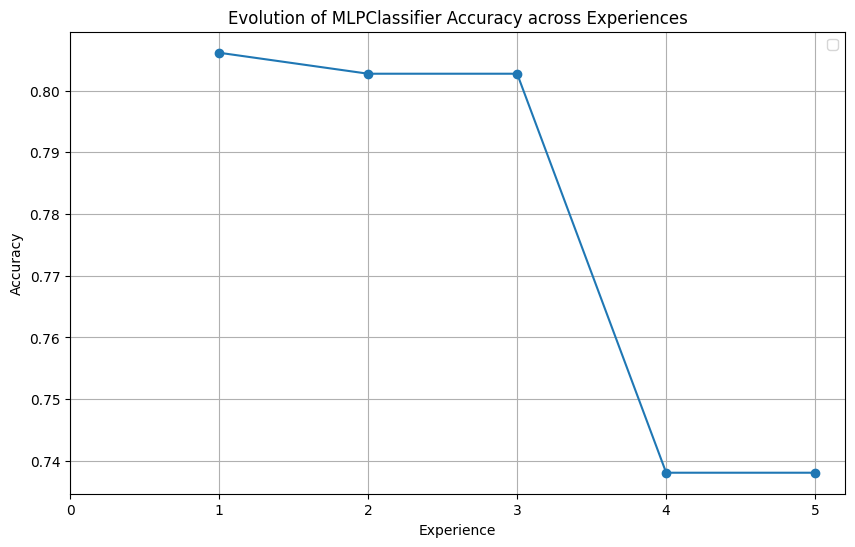

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


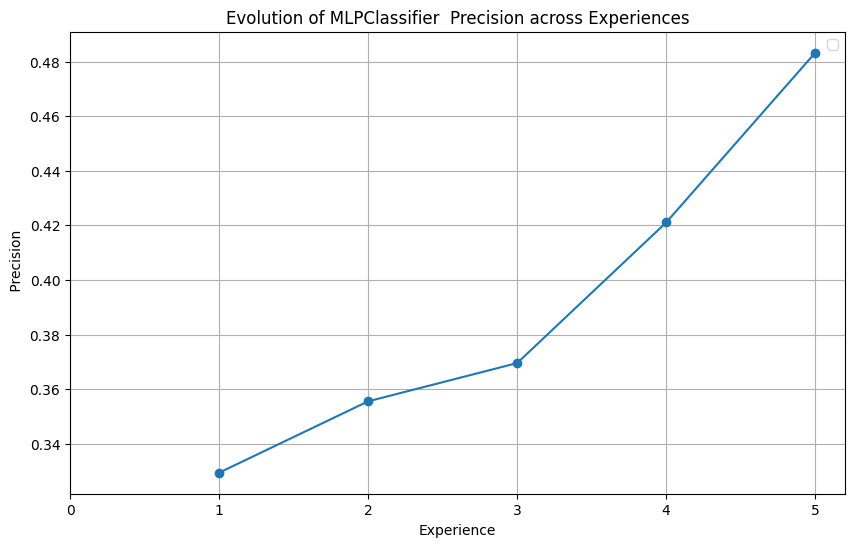

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


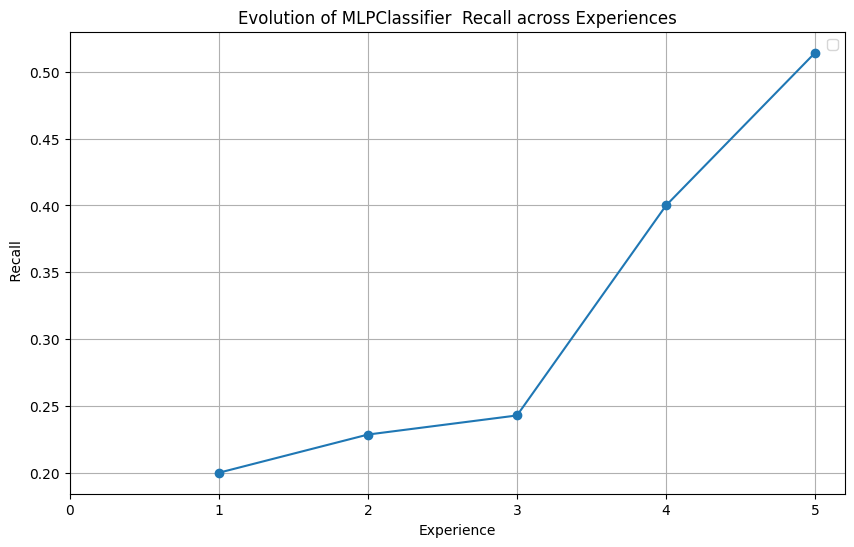

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


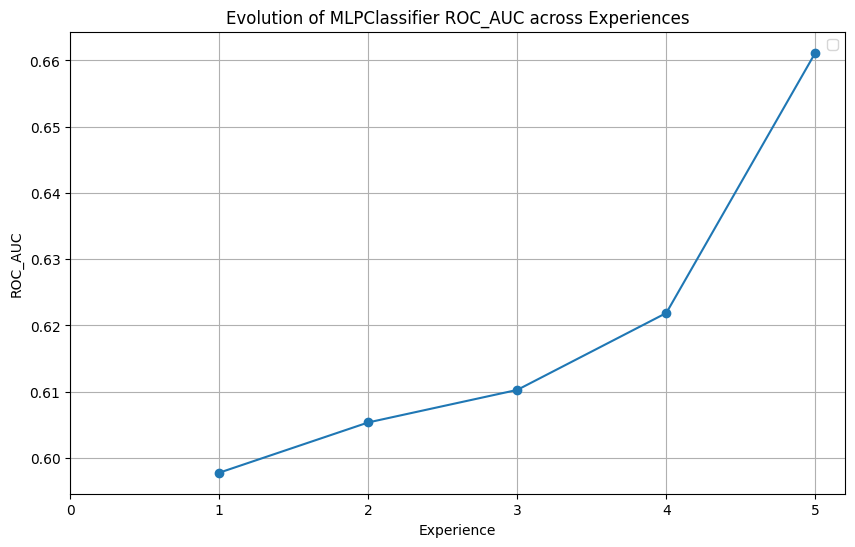

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


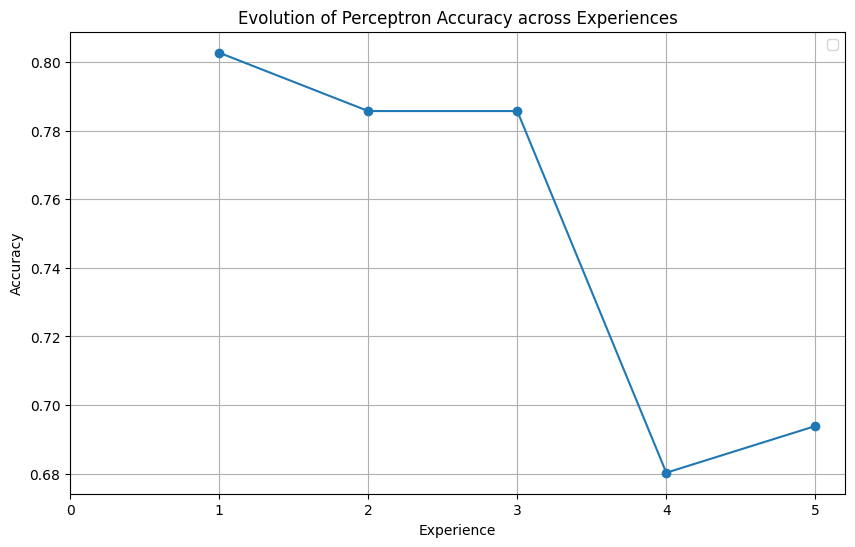

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


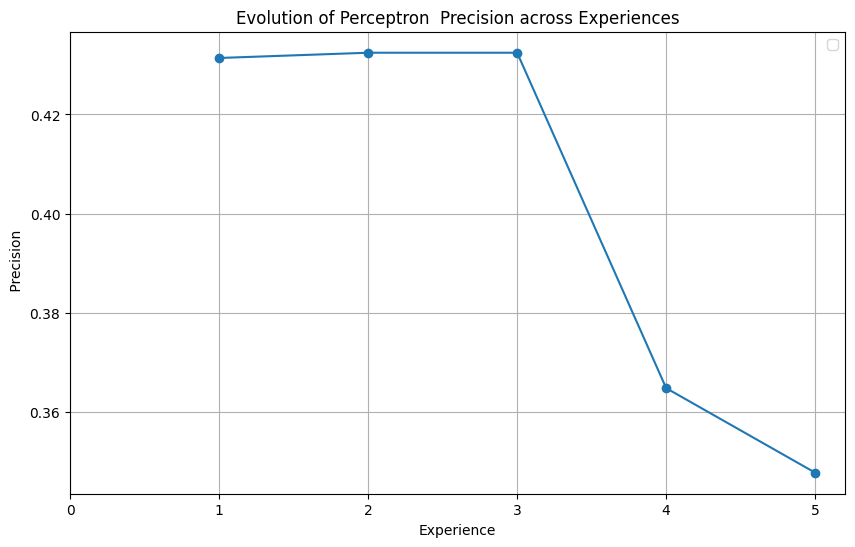

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


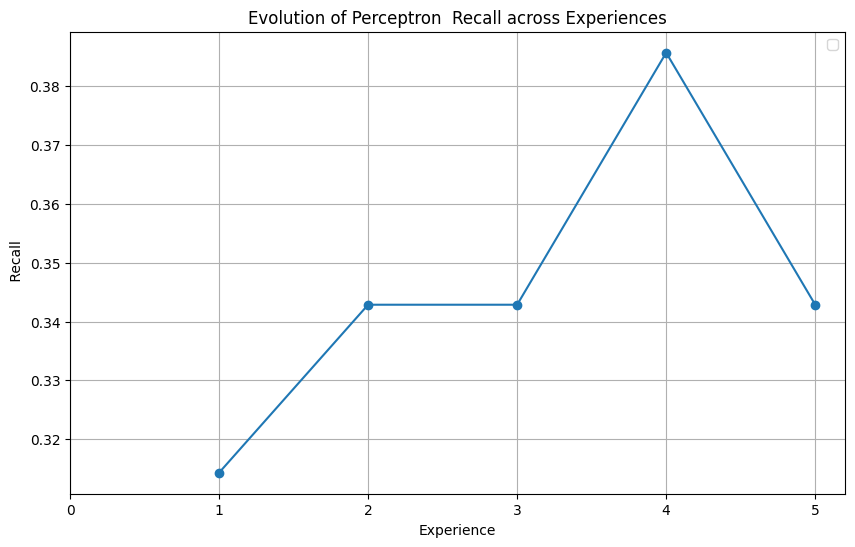

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


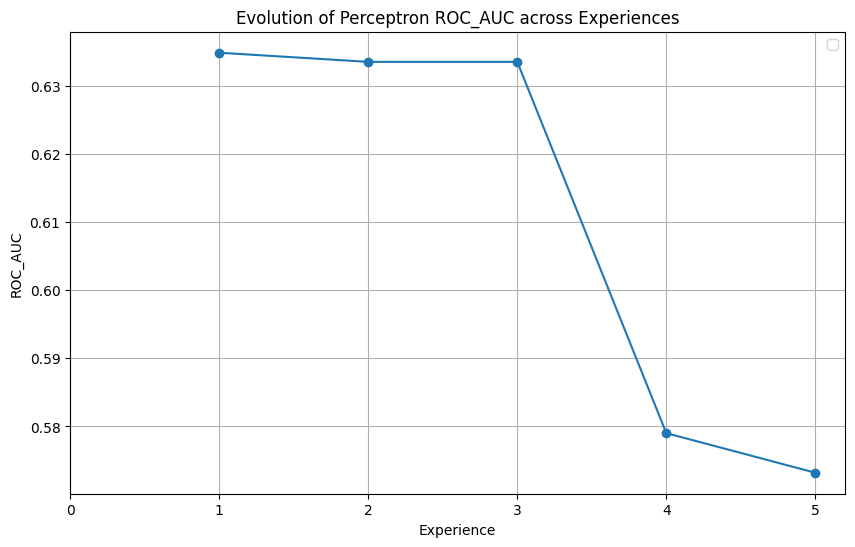

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


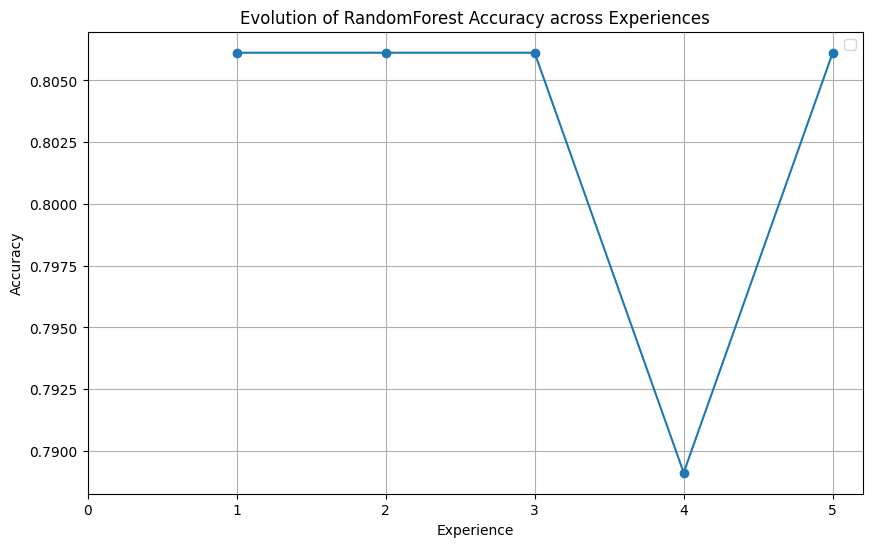

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


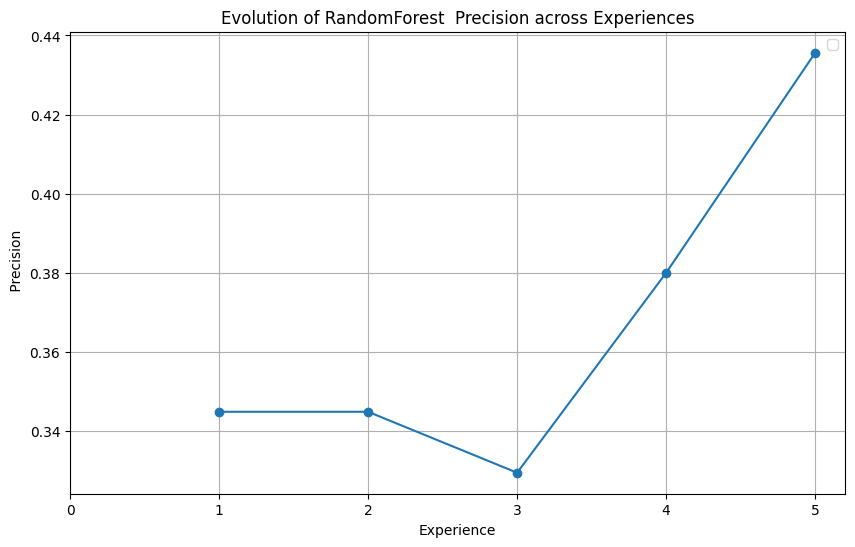

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


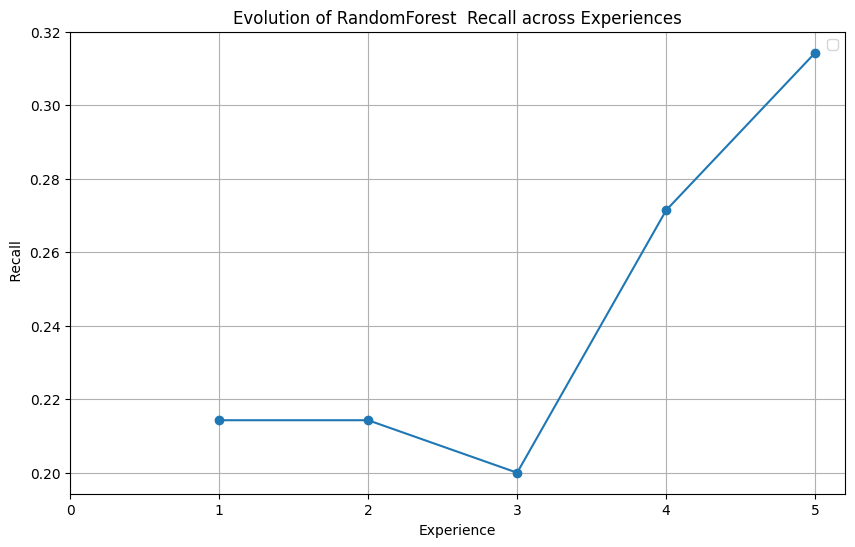

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


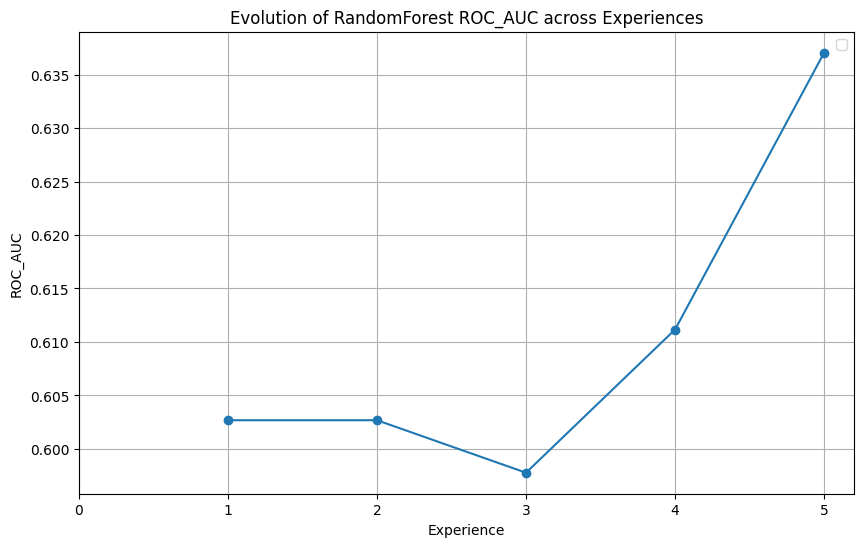

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


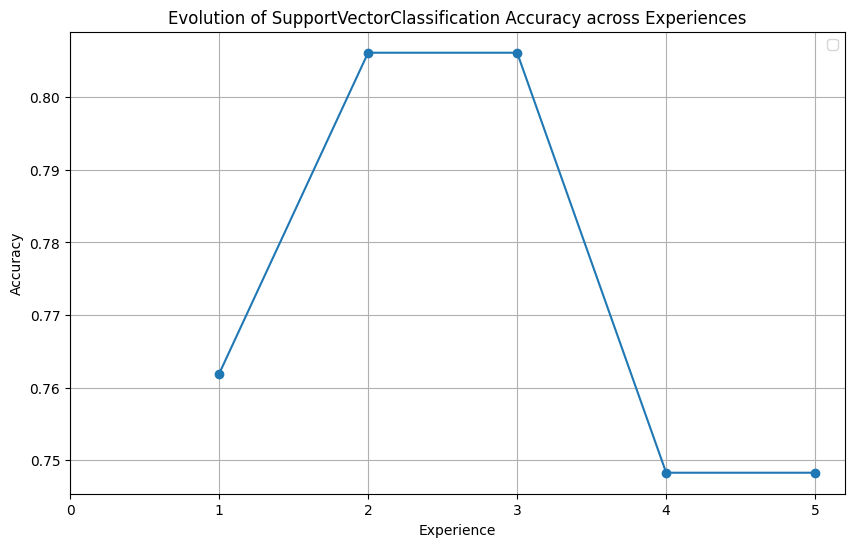

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


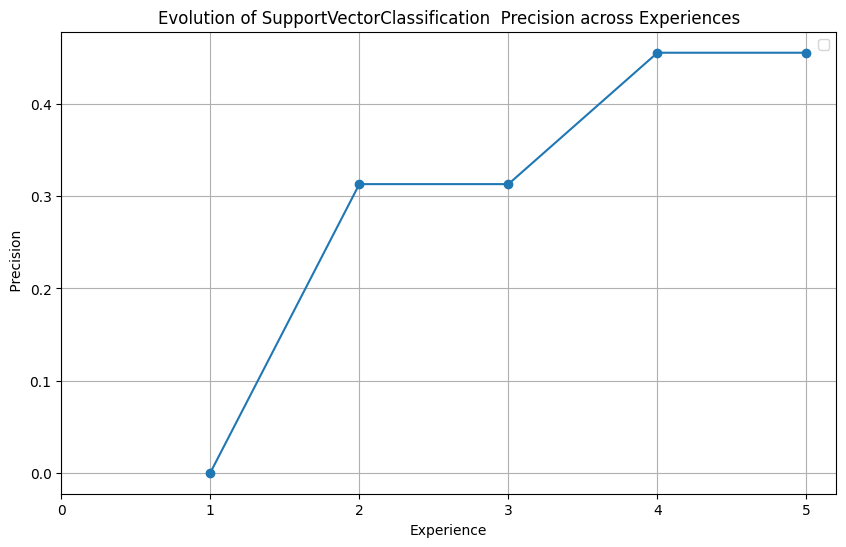

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


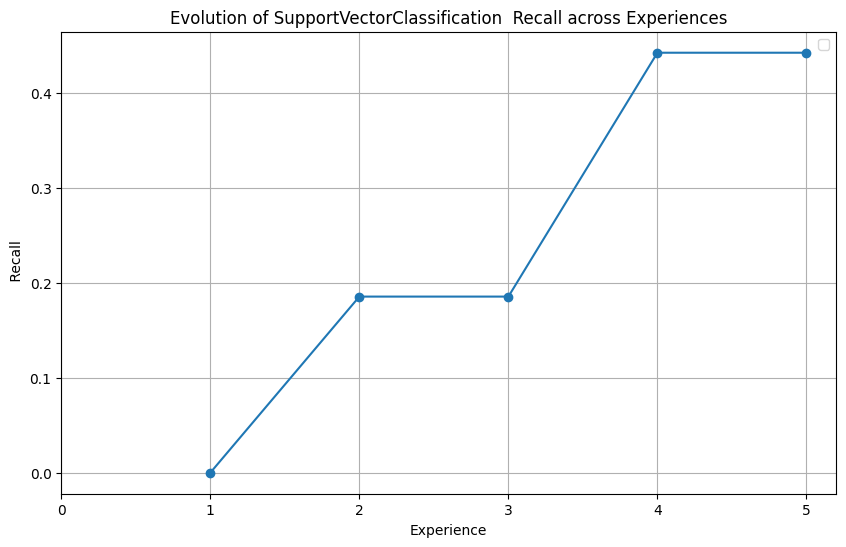

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


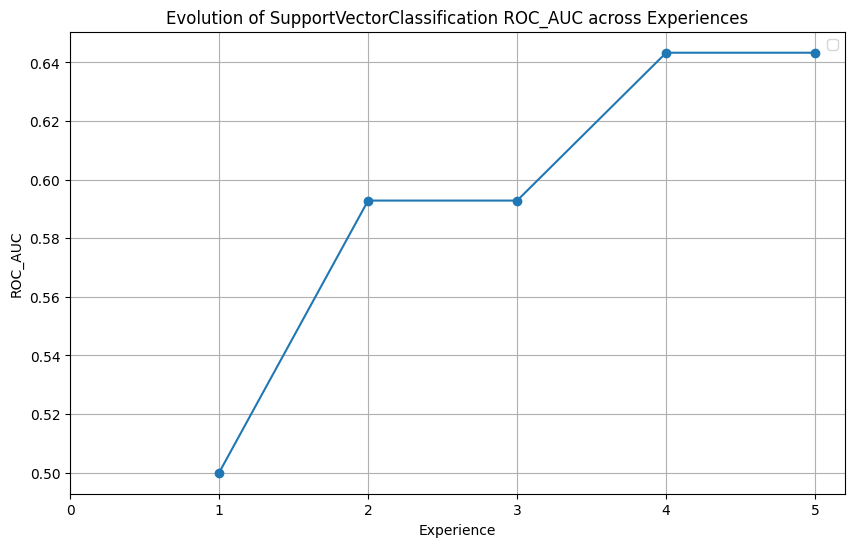

In [119]:
for model_name in models_list:
    for df_metric, metric in metrics_list:
        show_report(get_model_metric(graph_df, model_name, df_metric), model_name, metric)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


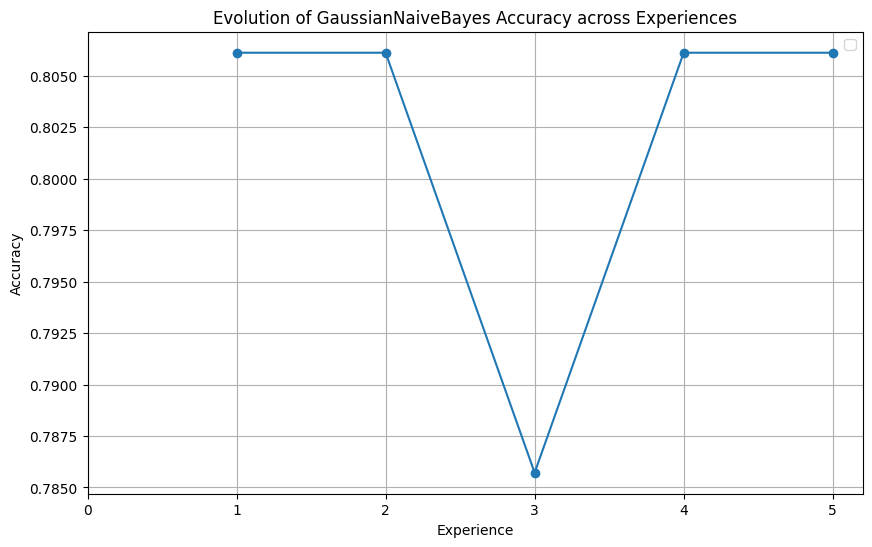

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


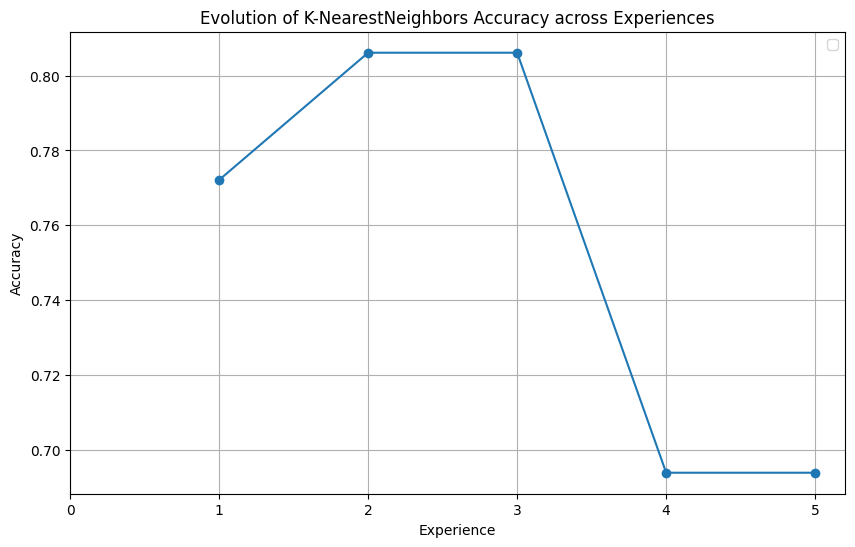

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


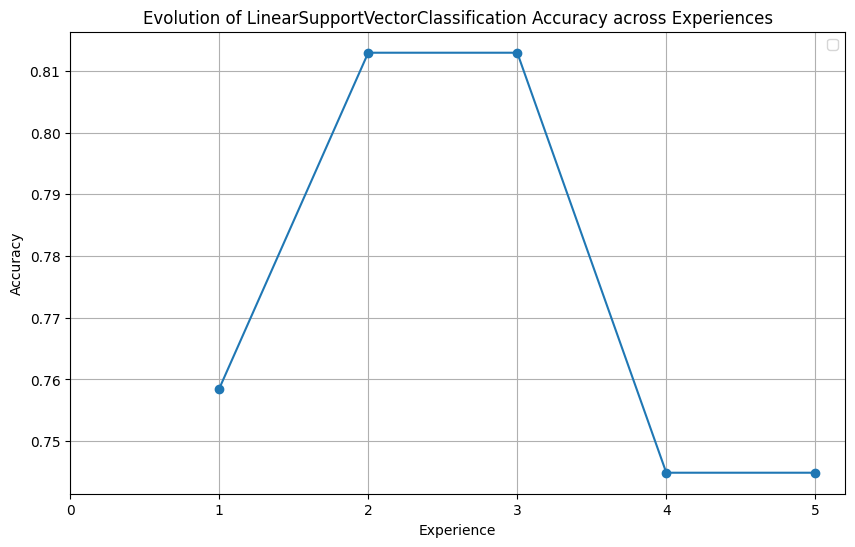

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


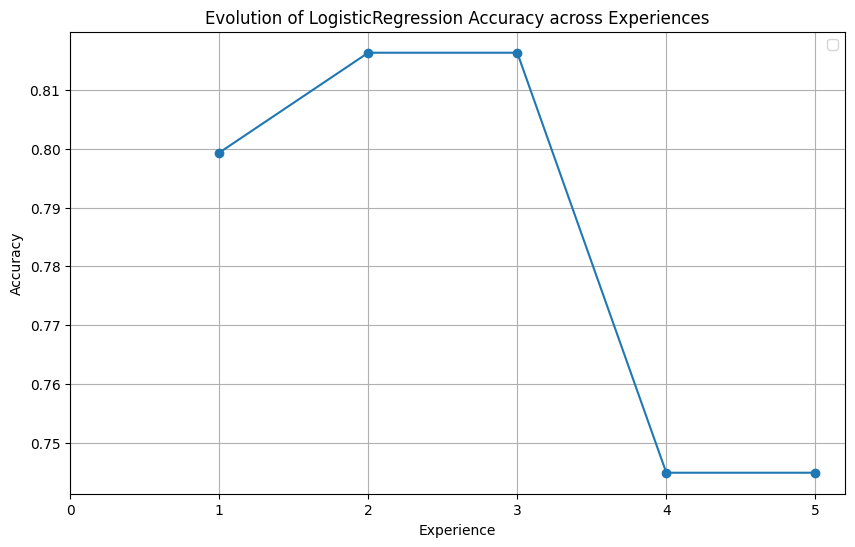

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


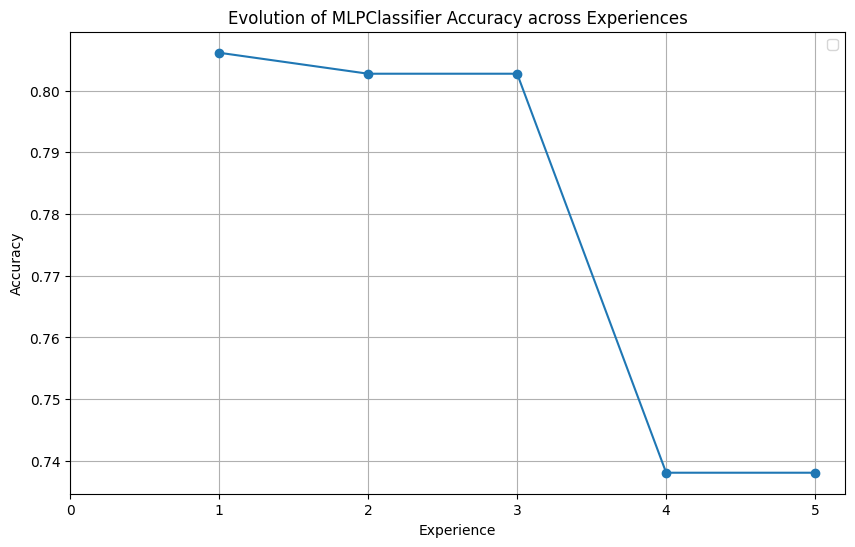

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


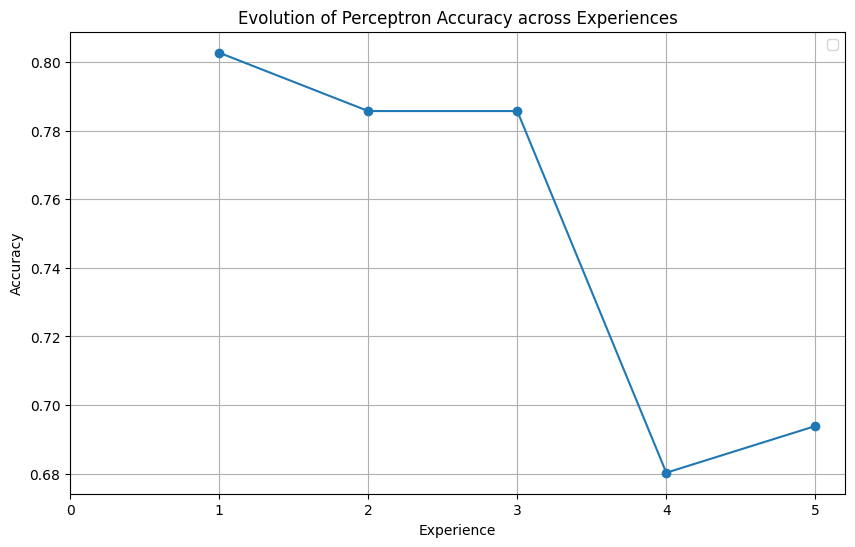

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


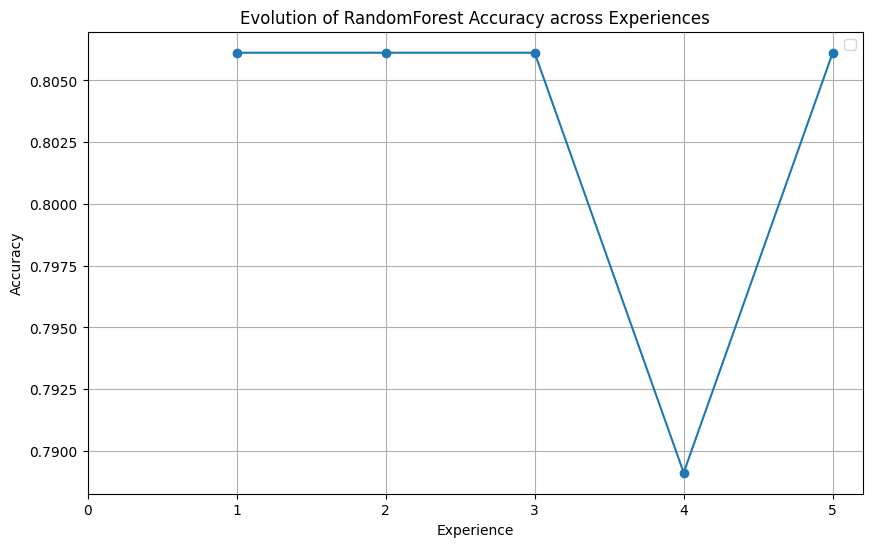

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


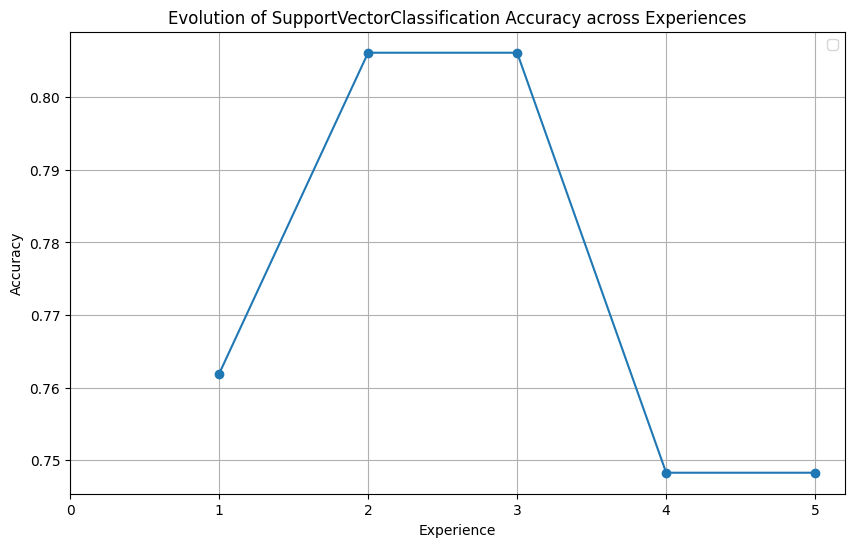

In [101]:

for model_name in models_list:
    show_report(get_model_metric(graph_df, model_name, 'Accuracy_Test'), model_name, 'Accuracy')

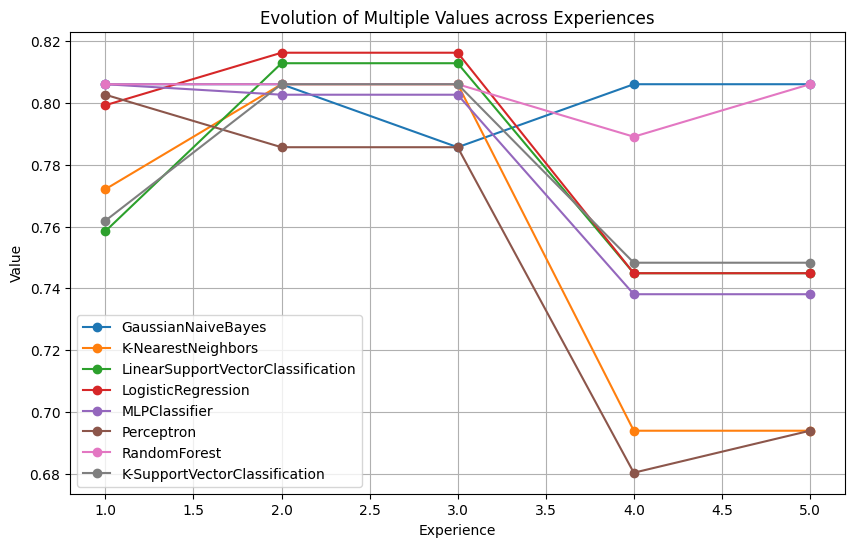

In [82]:
"""
GaussianNaiveBayes,
K-NearestNeighbors,
LinearSupportVectorClassification,
LogisticRegression,
MLPClassifier,
Perceptron,
RandomForest,
SupportVectorClassification
"""
gnb_data = graph_df.loc[graph_df['Model'] == "GaussianNaiveBayes", ['Accuracy_Test']]
knn_data = graph_df.loc[graph_df['Model'] == "K-NearestNeighbors", ['Accuracy_Test']]
lsvc_data = graph_df.loc[graph_df['Model'] == "LinearSupportVectorClassification", ['Accuracy_Test']]
lr_data = graph_df.loc[graph_df['Model'] == "LogisticRegression", ['Accuracy_Test']]
mlp_data = graph_df.loc[graph_df['Model'] == "MLPClassifier", ['Accuracy_Test']]
pcp_data = graph_df.loc[graph_df['Model'] == "Perceptron", ['Accuracy_Test']]
rf_data = graph_df.loc[graph_df['Model'] == "RandomForest", ['Accuracy_Test']]
svc_data = graph_df.loc[graph_df['Model'] == "SupportVectorClassification", ['Accuracy_Test']]
# Plot the data using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot([1,2,3,4,5], gnb_data, marker='o', label='GaussianNaiveBayes')
plt.plot([1,2,3,4,5], knn_data, marker='o', label='K-NearestNeighbors')
plt.plot([1,2,3,4,5], lsvc_data, marker='o', label='LinearSupportVectorClassification')
plt.plot([1,2,3,4,5], lr_data, marker='o', label='LogisticRegression')
plt.plot([1,2,3,4,5], mlp_data, marker='o', label='MLPClassifier')
plt.plot([1,2,3,4,5], pcp_data, marker='o', label='Perceptron')
plt.plot([1,2,3,4,5], rf_data, marker='o', label='RandomForest')
plt.plot([1,2,3,4,5], svc_data, marker='o', label='SupportVectorClassification')

# Add labels, title, and legend
plt.xlabel('Experience')
plt.ylabel('Value')
plt.title('Evolution of Multiple Values across Experiences')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


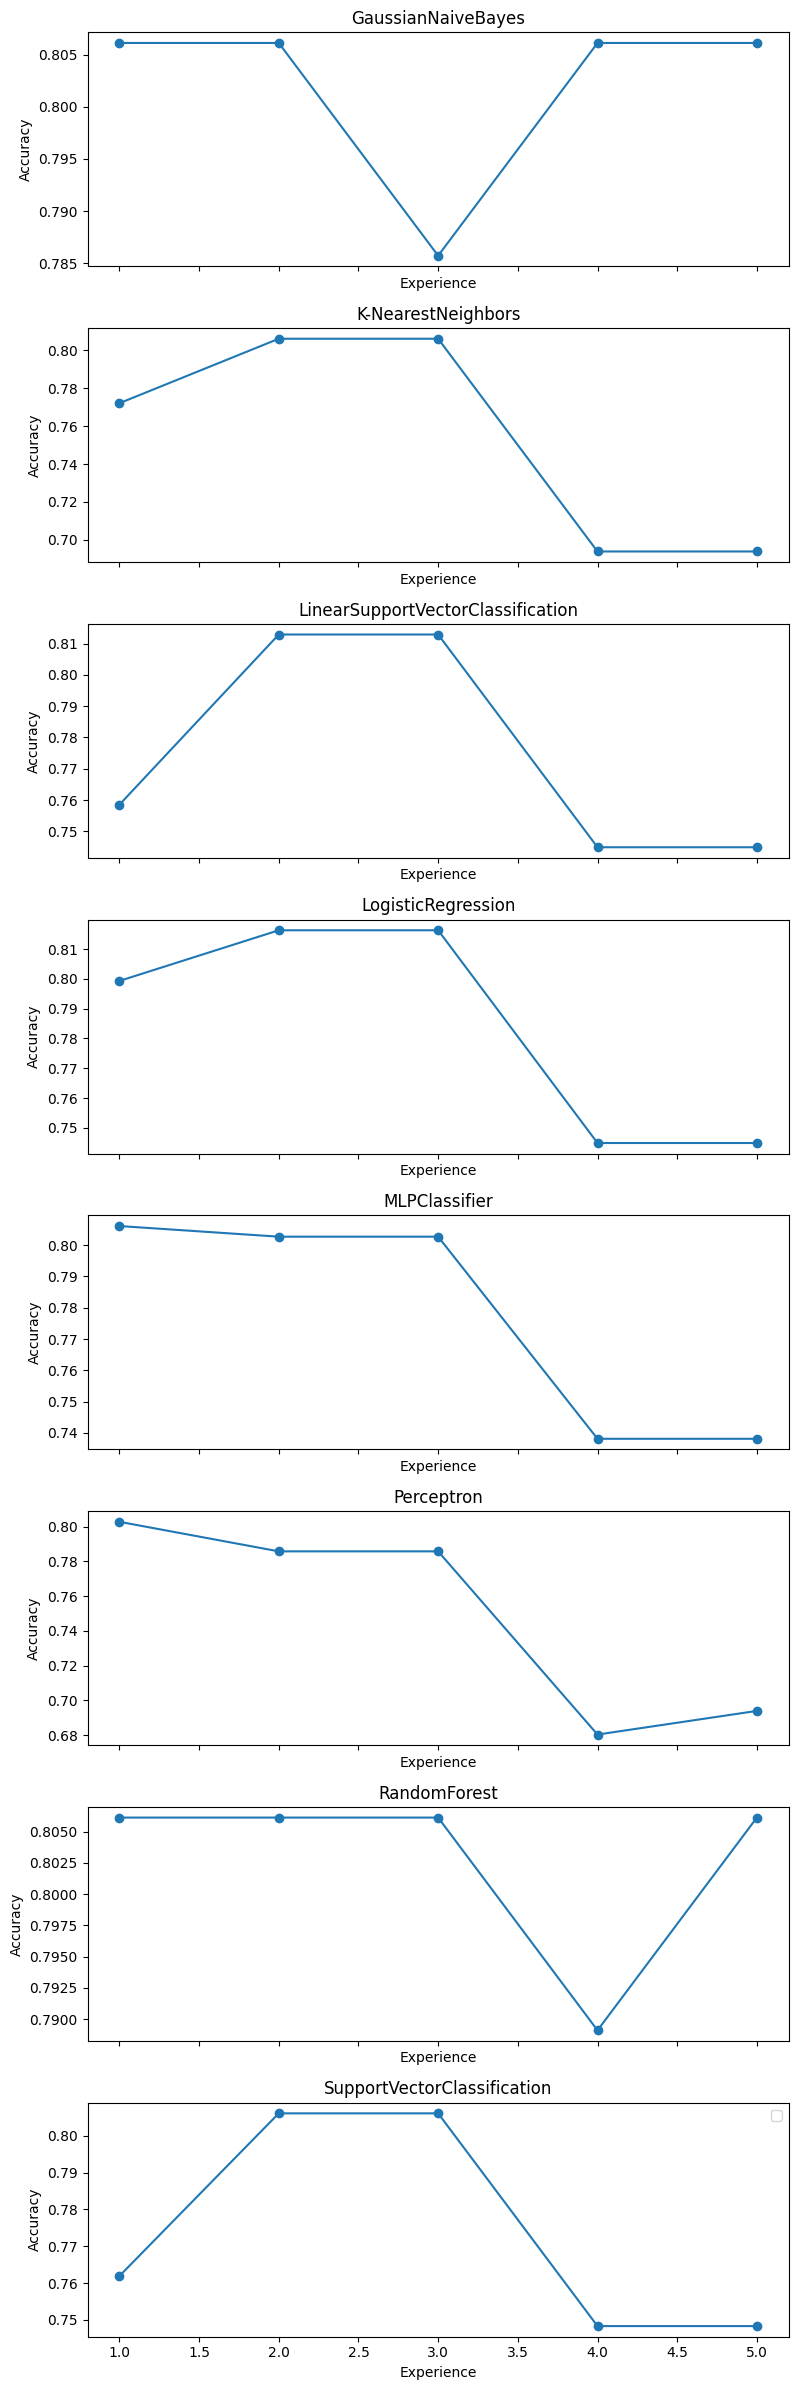

In [90]:
# Create a list of plot functions
def plot_function(ax, x, y, title):
    ax.plot(x, y, marker='o')
    ax.set_title(title)
    ax.set_xlabel('Experience')
    ax.set_ylabel('Accuracy')

# Create the subplots and arrange in a list-like format
fig, axes = plt.subplots(8, 1, figsize=(8, 24), sharex=True)

# Plot each dataset in a separate subplot
plot_function(axes[0], [1,2,3,4,5], gnb_data, 'GaussianNaiveBayes')
plot_function(axes[1], [1,2,3,4,5], knn_data, 'K-NearestNeighbors')
plot_function(axes[2], [1,2,3,4,5], lsvc_data, 'LinearSupportVectorClassification')
plot_function(axes[3], [1,2,3,4,5], lr_data, 'LogisticRegression')
plot_function(axes[4], [1,2,3,4,5], mlp_data, 'MLPClassifier')
plot_function(axes[5], [1,2,3,4,5], pcp_data, 'Perceptron')
plot_function(axes[6], [1,2,3,4,5], rf_data, 'RandomForest')
plot_function(axes[7], [1,2,3,4,5], svc_data, 'SupportVectorClassification')

# Adjust the layout and show the plots
plt.legend()
plt.tight_layout()
plt.show()

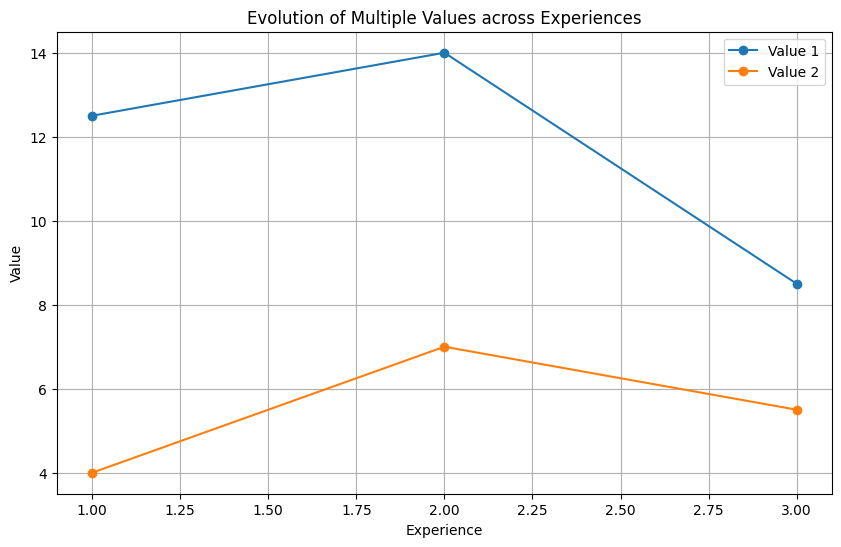

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'experience': [1, 1, 2, 2, 3, 3],
    'value1': [10, 15, 8, 20, 5, 12],
    'value2': [2, 6, 4, 10, 3, 8]
}

df = pd.DataFrame(data)

# Group by 'experience' and calculate the mean for each value
grouped_data = df.groupby('experience').mean()

# Plot the data using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['value1'], marker='o', label='Value 1')
plt.plot(grouped_data.index, grouped_data['value2'], marker='o', label='Value 2')

# Add labels, title, and legend
plt.xlabel('Experience')
plt.ylabel('Value')
plt.title('Evolution of Multiple Values across Experiences')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Escolher o modelo final

O modelo com o melhor desempenho:
- Melhor Accuracy
- Desempate por F1
- Desempate por ROC_AUC
- Desempate por Precision
- Desempate por Recall